# Analiza podatkov o knjigah

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
knjige = pd.read_csv("goodreads_knjige.csv", index_col="id_knjige")

# Da se leto izdaje in število strani prikažeta kot int:
knjige["leto_izdaje"] = knjige["leto_izdaje"].astype("Int64")
knjige["st_strani"] = knjige["st_strani"].astype("Int64")

## Uvod
V tem dokumentu bom analizirala knjige na seznamu [Best Books of the 21st Century](https://www.goodreads.com/list/show/7.Best_Books_of_the_21st_Century), torej knjige, izdane v 21. stoletju (med 1. 1. 2001 in 31. 12. 2100), ki so jih uporabniki spletne strani Goodreads uvrstili kot najboljše. Zbrala sem podatke iz prvih 30 strani seznama, torej 3000 knjig. Vrstni red knjige na seznamu je določen z skupno oceno (total score). Ta temelji na več dejavnikih, vključno s številom ljudi, ki so glasovali zanjo, in podanimi ocenami.  
S seznama sem pobrala naslednje podatke o vsaki knjigi: ID, ki ga ustvari Goodreads, naslov, avtor, povprečna ocena, število ocen, število recenzij, leto izdaje, število strani, jezik, število trenutnih bralcev, žanri.  
V spodnji tabeli je prikazanih prvih 10 knjig na tem seznamu - torej po tem kriteriju 10 najboljših knjig 21. stoletja.

In [197]:
knjige.head(10)

,naslov,avtor,povp_ocena,st_ocen,st_recenzij,leto_izdaje,st_strani,jezik,st_trenutnih_bralcev,zanri
id_knjige,,,,,,,,,,
58613224,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,4.62,4027023,96378,2007,784,English,52841,"Fantasy, Young Adult, Fiction, Magic, Children..."
2767052,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.35,9649908,253738,2008,374,English,104020,"Young Adult, Dystopia, Fiction, Fantasy, Scien..."
77203,The Kite Runner,Khaled Hosseini,4.35,3418413,110251,2003,371,English,50245,"Fiction, Historical Fiction, Classics, Contemp..."
19063,The Book Thief,Markus Zusak,4.39,2815021,157168,2006,592,English,99785,"Historical Fiction, Fiction, Young Adult, Clas..."
58613345,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.58,3579983,67597,2005,672,English,52192,"Fantasy, Fiction, Young Adult, Magic, Audioboo..."
58613451,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,3709438,74754,2003,896,English,85923,"Fantasy, Young Adult, Fiction, Magic, Audioboo..."
4667024,The Help,Kathryn Stockett,4.47,2972171,93428,2009,464,English,24949,"Fiction, Historical Fiction, Book Club, Histor..."
128029,A Thousand Splendid Suns,Khaled Hosseini,4.45,1692128,89730,2007,372,English,40655,"Fiction, Historical Fiction, Book Club, Contem..."
6148028,"Catching Fire (The Hunger Games, #2)",Suzanne Collins,4.35,4039876,148004,2009,391,English,59250,"Young Adult, Dystopia, Fiction, Fantasy, Scien..."


## Osnovni pregled podatkov


V spodnjih tabelah so predstavljeni podatki o številu knjig, izdanih v posameznih desetletjih, letih in jezikih.  
Za najbolj produktivno leto se je izkazalo leto 2006, naslednja pa so še leta 2007, 2011, 2010 in 2012. Pričakovano je, da se v tej tabeli pojavijo letnice iz prejšnjih dveh desetletij, saj je od izdaje pripradajočih knjig minilo že več let in jih je imelo priložnost prebrati že več bralcev.  
Največ knjig je napisanih v angleščini - kar 98% vseh knjig na seznamu. Sledijo španščina, francoščina in nemščina, v ostalih jezikih pa je napisano manj kot 5 knjig.

In [198]:
knjige_desetletja = knjige.copy() # da originalna razpredelnica ostane brez stolpca desetletje
knjige_desetletja["desetletje"] = (knjige_desetletja["leto_izdaje"] // 10) * 10

In [199]:
desetletja = knjige_desetletja.groupby("desetletje")["naslov"].count()
podatki1 = {
    "desetletje": desetletja.index,
    "število knjig": desetletja.values,
}
razpredelnica1 = pd.DataFrame(data=podatki1)
razpredelnica1

,desetletje,število knjig
0,2000,1479
1,2010,1418
2,2020,98


In [200]:
top_5_let = knjige.groupby("leto_izdaje")["naslov"].count().nlargest(5)
podatki2 = {
    "leto izdaje": top_5_let.index,
    "število knjig": top_5_let.values,
}
razpredelnica2 = pd.DataFrame(data=podatki2)
razpredelnica2

,leto izdaje,število knjig
0,2006,271
1,2007,263
2,2011,253
3,2010,225
4,2012,221


In [201]:
jeziki = (
    knjige.groupby("jezik")["naslov"]
    .count()
    .reset_index() # "jezik" iz indeksa prestavi v stolpec
    .rename(columns={"naslov": "število knjig"})
    .sort_values(by="število knjig", ascending=False)
    .reset_index(drop=True) # da so števila v prvem stolpcu urejena po vrsti
)
jeziki["procent"] = ((jeziki["število knjig"] / jeziki["število knjig"].sum()) * 100).round(2) # dodamo stolpec

jeziki

,jezik,število knjig,procent
0,English,2922,98.42
1,Spanish; Castilian,8,0.27
2,French,7,0.24
3,German,7,0.24
4,Arabic,4,0.13
5,Dutch; Flemish,3,0.10
6,Finnish,3,0.10
7,Italian,3,0.10
8,"Greek, Modern (1453-)",3,0.10
9,Polish,2,0.07


Če zaokrožimo ocene na celo število in rezultate prikažemo v tortnem diagramu, lahko opazimo, da ima večina knjig povprečno oceno 4 (kar 93,2 %). Morda je presenetljivo, da je delež knjig z zaokroženo oceno 5 precej majhen (3,6 %), na seznamu pa je tudi delež (3,2 %) knjig z zaokroženo oceno 3. To lahko pripisujemo dejstvu, da povprečna ocena ni edini kriterij za uvrstitev na listo.

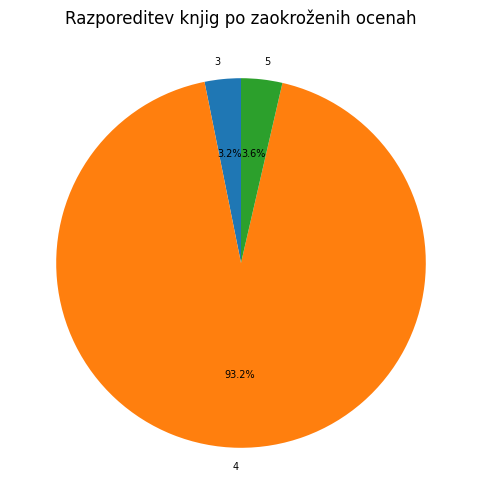

In [202]:
ocene = knjige["povp_ocena"]
zaokrozene_ocene = ocene.apply(round)
st_ocen = zaokrozene_ocene.value_counts().sort_index()
plt.figure(figsize=(6,6))
plt.pie(st_ocen, 
        labels=st_ocen.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        textprops={'fontsize': 7}
        )
# autopct='%1.1f%%' poskrbi, da se na vsakem delu torte pokaže delež v procentih
# %1.1f%% pomeni ena decimalka in znak %
# textprops se uporablja za nastavitve besedila na tortnem diagramu
# uporabimo parameter fontsize, da nastavimo velikost pisave
plt.title("Razporeditev knjig po zaokroženih ocenah")
plt.show()


## Analiza odnosov med podatki
Če analiziramo povprečno oceno knjig skozi leta, lahko v spodnjem grafu opazimo, da ocena približno ves čas narašča in se skokovito zviša v zadnjih letih. To lahko razlagamo s tem, da je pri novejših knjigah število ocen še manjše in pogosto jih delajo najbolj zagreti bralci, ki si knjigo želijo prebrati čimprej - ti pa ponavadi dajejo višje ocene. Po nekaj letih se povprečje večinoma stabilizira, ko knjigo oceni tudi širši krog bralcev.

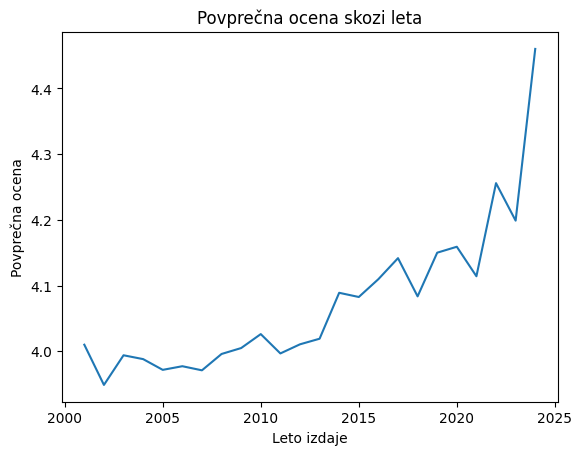

In [214]:
knjige.groupby("leto_izdaje")["povp_ocena"].mean().plot(title="Povprečna ocena skozi leta")
plt.xlabel("Leto izdaje")
plt.ylabel("Povprečna ocena")
plt.show()

Na tem mestu se lahko vprašamo, ali so knjige z več ocenami tudi bolje ocenjene. Odnos med tema spremenljivkama priakzuje spodnji diagram. Opazimo lahko, da imajo knjige z relativno malo ocenami precej razpršene povprečne ocene, z naraščanjem števila ocen pa se povprečna ocena rahlo stabilizira.
To vseeno ni pravilo in obstajajo precejšnja odstopanja od regresijske premice, vendar lahko kljub temu opazimo pozitivno korelacijo med spremenljivkama. Knjige z velikim številom ocen so namreč pogosto bolj kvalitetne in priljubljene, zato se povprečna ocena drastično ne spušča.

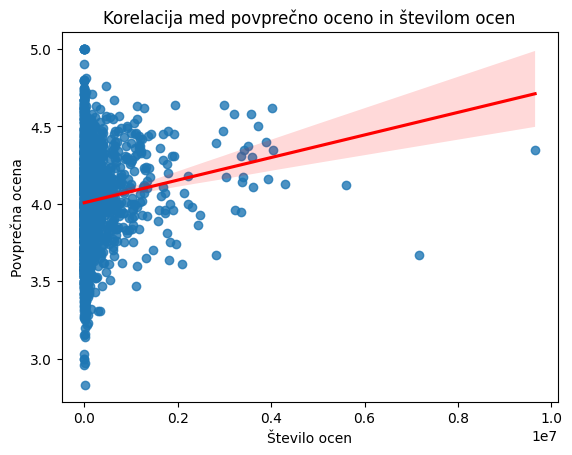

In [215]:
sns.regplot(
    x="st_ocen", 
    y="povp_ocena", 
    data=knjige,
    line_kws={"color":"red"} # s tem določimo nastavitve za regresijsko premico
)
plt.xlabel("Število ocen")
plt.ylabel("Povprečna ocena")
plt.title("Korelacija med povprečno oceno in številom ocen")
plt.show()


Pozitivno korelacijo lahko preverimo tudi s funkcijo corr(), ki izračuna korelacijsko matriko med stolpcema st_ocen in povp_ocena. Izračuna se Pearsonov korelacijski koeficient, ki meri linearno povezavo med dvema spremenljivkama. Diagonalni elementi so vedno 1, elementi izven diagonale pa so v tem primeru pozitivna števila, ki so blizu 0, kar pomeni, da je pozitivna korelacija šibka.

In [216]:
knjige[["st_ocen", "povp_ocena"]].corr()

,st_ocen,povp_ocena
st_ocen,1.000000,0.121077
povp_ocena,0.121077,1.000000


Zanimivo je, da je korelacija med povprečno oceno in številom recenzij večja. Na spodnjem prikazu lahko opazimo, da se točke bolj prilegajo regresijski premici.  
Število recenzij je ponavadi boljši indikator "kakovosti" ali priljubljenosti knjige kot število ocen, ker odraža angažiranost bralcev. Recenzije namreč ponavadi pišejo bolj motivirani bralci, ki knjigo tudi bolj temeljito ocenijo. Število ocen pa lahko vsebuje veliko površinskih ocen.

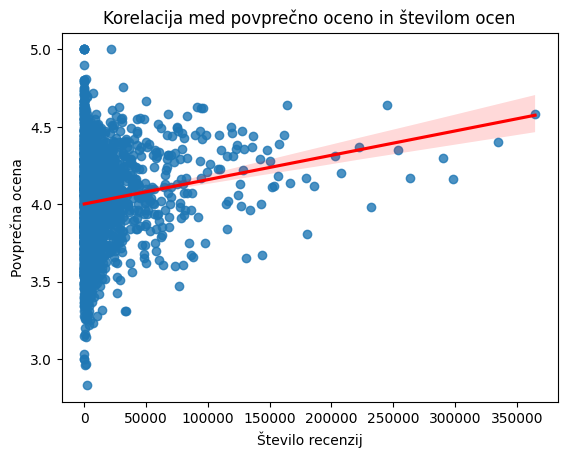

In [ ]:
sns.regplot(
    x="st_recenzij", 
    y="povp_ocena", 
    data=knjige,
    line_kws={"color":"red"} # s tem določimo nastavitve za regresijsko premico
)
plt.xlabel("Število recenzij")
plt.ylabel("Povprečna ocena")
plt.title("Korelacija med povprečno oceno in številom recenzij")
plt.show()

To se odraža tudi v nekoliko višjem Pearsonovem korelacijskem koeficientu.

In [224]:
knjige[["st_recenzij", "povp_ocena"]].corr()

,st_recenzij,povp_ocena
st_recenzij,1.000000,0.146467
povp_ocena,0.146467,1.000000


Na sledečem stolpičnem diagramu lahko opazimo, da ima velika večina knjig manj kot 500 strani. Izstopa nekaj knjig, ki naj bi imele več kot 1400 strani, vendar pri podrobnejšem ogledu ugotovimo, da gre večinoma za kolekcije vseh knjig iz serije, ki so na Goodreadsu predstavljene kot ena knjiga. Edina samostojna knjiga v tej tabeli je The Fiery Cross (Outlander, #5) avtorice Diane Gabaldon, ki ima 1443 strani.

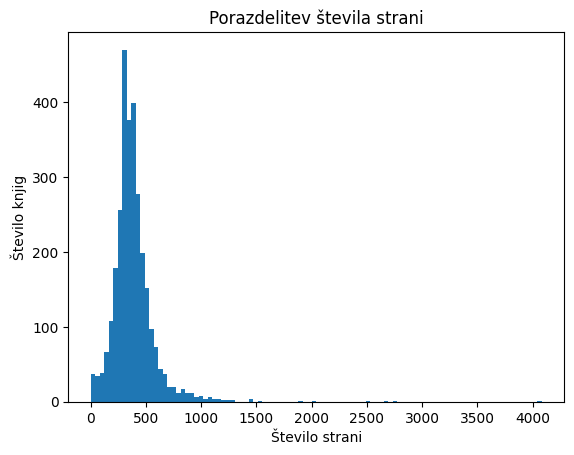

In [218]:
knjige["st_strani"].plot.hist(bins=100, title="Porazdelitev števila strani")
plt.xlabel("Število strani")
plt.ylabel("Število knjig")
plt.show()

In [219]:
najdaljsa_knjiga = knjige[knjige["st_strani"] > 1400]
najdaljsa_knjiga

,naslov,avtor,povp_ocena,st_ocen,st_recenzij,leto_izdaje,st_strani,jezik,st_trenutnih_bralcev,zanri,razred_ocen,razred_recenzij
id_knjige,,,,,,,,,,,,
7822895,"The Millennium Trilogy (Millennium Trilogy, #1-3)",Stieg Larsson,4.47,57104,1949,2010,1531,English,2312,"Fiction, Thriller, Mystery, Crime, Suspense, M...","(50000, 100000]",1k–4.9k
10967,"The Fiery Cross (Outlander, #5)",Diana Gabaldon,4.26,223766,9322,2005,1443,English,17980,"Historical Fiction, Romance, Fantasy, Fiction,...","(100000, 500000]",5k–19.9k
24812,The Complete Calvin and Hobbes,Bill Watterson,4.81,41740,1253,2005,1456,English,1050,"Humor, Graphic Novels, Fiction, Comics, Classi...","(10000, 50000]",1k–4.9k
22847427,"Trust Trilogy (Trust Trilogy, #1-3; Trust seri...",Cristiane Serruya,4.09,130,30,2014,1900,English,120,NaN,"(0, 1000]",<100
81499,The Noble Life of The Prophet ﷺ,علي محمد الصلابي,4.41,992,133,2001,2024,English,411,"Islam, History, Religion, Biography, Nonfiction","(0, 1000]",100–999
21481566,"The Inheritance Trilogy (Inheritance, #1-3.5)",N.K. Jemisin,4.28,9281,628,2014,1462,English,3989,"Fantasy, Fiction, Science Fiction, Adult, High...","(1000, 10000]",100–999
9814682,A Song of Ice and Fire (A Song of Ice and Fire...,George R.R. Martin,4.63,48052,1036,2011,4081,English,4972,"Fantasy, Fiction, Adventure, Epic Fantasy, Sci...","(10000, 50000]",1k–4.9k
8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",J.K. Rowling,4.71,170744,350,2004,2690,English,344,"Fantasy, Harry Potter, Fiction, Young Adult, M...","(100000, 500000]",100–999
8726744,The Twilight Saga Complete Collection,Stephenie Meyer,4.34,75504,478,2010,2752,English,1972,"Fantasy, Romance, Young Adult, Vampires, Paran...","(50000, 100000]",100–999
